In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [7]:
df = pd.read_csv('/content/Salary_dataset.csv')
df=pd.DataFrame(df)
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [12]:
df.dtypes

,0
Unnamed: 0,int64
YearsExperience,float64
Salary,float64


In [13]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [16]:
columns = df.columns
print(columns)

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')


In [20]:
df2=df.drop(columns=['Unnamed: 0'], axis=True)
print(df2.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


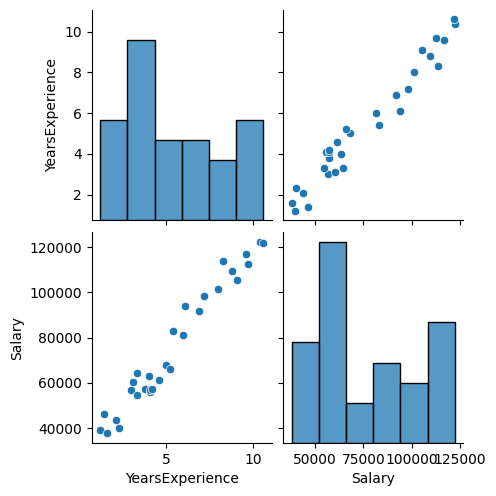

In [21]:
sns.pairplot(df2)

In [22]:
df2.shape

(30, 2)

**Split Train test data**

In [43]:
X = df2.drop(['Salary'], axis=True).values
Y=df2['Salary']

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [45]:
(X_train.shape),
(X_test.shape),
(Y_train.shape),
(Y_test.shape)

(6,)

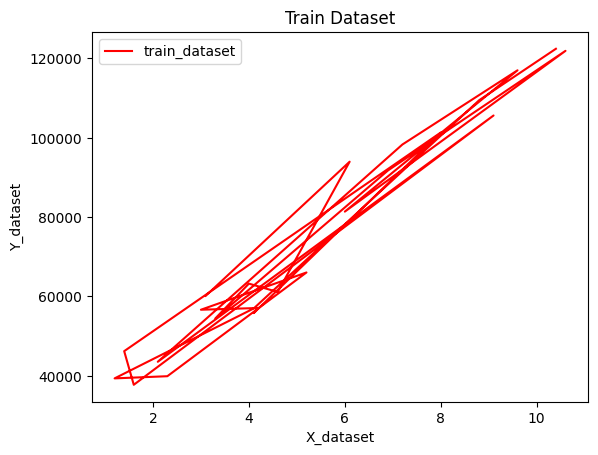

In [46]:
#visualise train dataset

plt.plot(X_train, Y_train, 'r', label='train_dataset')
plt.title('Train Dataset')
plt.xlabel('X_dataset')
plt.ylabel('Y_dataset')
plt.legend()
plt.show()

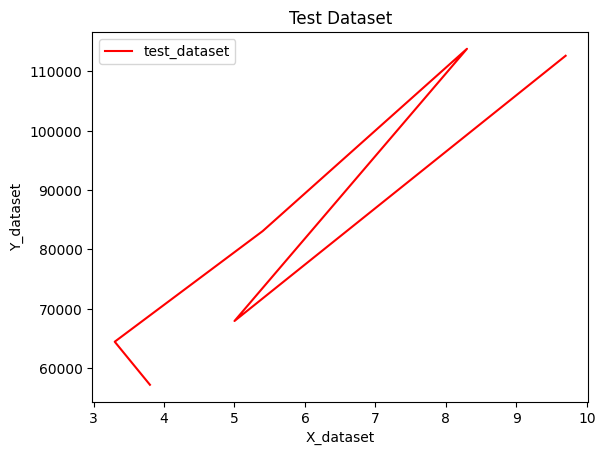

In [47]:
#visualise test dataset

plt.plot(X_test, Y_test, 'r', label='test_dataset')
plt.title('Test Dataset')
plt.xlabel('X_dataset')
plt.ylabel('Y_dataset')
plt.legend()
plt.show()

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

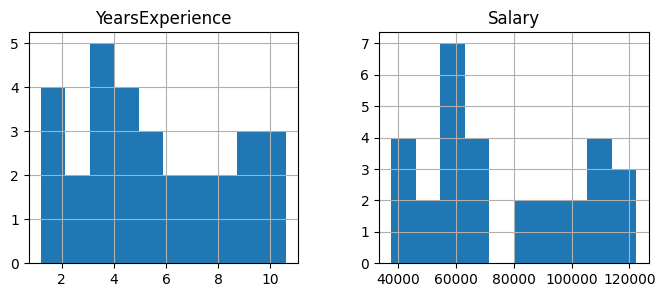

In [48]:
df2.hist(figsize=(8,3))

In [49]:
df2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

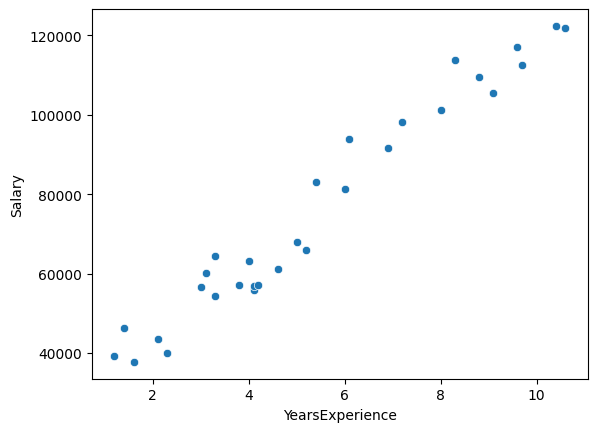

In [52]:
sns.scatterplot(df2, x='YearsExperience', y='Salary')

In [53]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [54]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [55]:
y_pred = regressor.predict(X_test)
y_pred

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [58]:
regressor.intercept_

24380.201479473704

In [59]:
regressor.coef_

array([9423.81532303])

In [60]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([122387.880839  , 107309.77632215,  63017.8443039 ,  35688.77986711,
        46054.97672244,  73384.04115923,  52651.64744857,  63960.2258362 ,
        63017.8443039 ,  99770.72406372,  37573.54293172,  39458.30599632,
       110136.92091906,  44170.21365784,  92231.6718053 , 114848.82858057,
        80923.09341766, 124272.6439036 ,  89404.52720839,  55478.79204548,
        62075.4627716 ,  67729.75196542,  81865.47494996,  53594.02898087])

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
mae = mean_squared_error(Y_test, y_pred)
mae

49830096.855908394

In [66]:
r2 = r2_score(Y_test, y_pred)
r2

0.9024461774180497

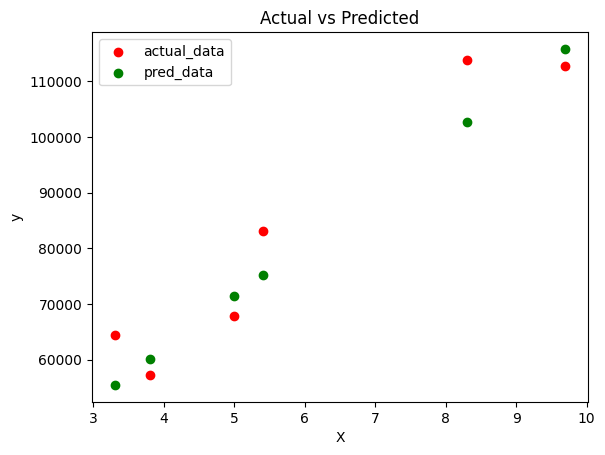

In [72]:


plt.scatter(X_test, Y_test, color='r', label='actual_data')  # Use `color` for the color argument
plt.scatter(X_test, y_pred, color='g', label='pred_data')    # Same here for predicted data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
